Convenience function for fitting
==============================

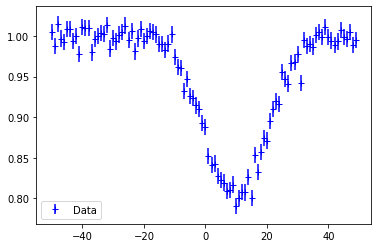

In [1]:
from __future__ import print_function, division
# Import numpy and matplotlib
from numpy import arange, sqrt, exp, pi, random, ones_like
import matplotlib.pylab as plt
import scipy.optimize as sco
# ... and now the funcFit2 package
from PyAstronomy import funcFit2 as fuf2

# For reproducability
random.seed(1234)

# Create some mock data
# Choose parameters...
gPar = {"A":-5.0, "sig":10.0, "mu":10.0, "off":1.0, "lin":0.0}
# ...and calculate profile...
x = arange(100) - 50.0
y = gPar["off"] + gPar["A"] / sqrt(2*pi*gPar["sig"]**2) \
    * exp(-(x-gPar["mu"])**2/(2*gPar["sig"]**2))
# ...add some noise...
y += random.normal(0.0, 0.01, x.size)
# ...and save the error bars
yerr = ones_like(x)*0.01

plt.errorbar(x, y, yerr=yerr, fmt='b+', label="Data")
plt.legend()
plt.show()

In [2]:
# Create a fitting object representing a Gaussian and set guess parameters.
gf = fuf2.GaussFit()

# Set guess values for the parameters
gf["A"] = -10.0
gf["sig"] = 15.77
gf["off"] = 0.96
gf["mu"] = 7.5

# Thaw parameters to be treated as variable during the fit
gf.thaw(["A", "sig", "off", "mu"])

# Save starting parameters
pstart = gf.parameters()

Use convenience function
---------------------------------------

In [3]:
# Use a convenience function to carry out optimization
# using various algorithms from scipy

# Let them start from the same starting point
gf.assignValues(pstart)
fr1 = fuf2.fitfmin(gf, gf.chisqr, x, y, yerr=yerr, disp=0)
# Save resulting model
model1 = gf.evaluate(x)

gf.assignValues(pstart)
fr2 = fuf2.fitfmin_powell(gf, gf.chisqr, x, y, yerr=yerr, disp=0)
model2 = gf.evaluate(x)

gf.assignValues(pstart)
fr3 = fuf2.fitfmin_l_bfgs_b(gf, gf.chisqr, x, y, yerr=yerr)
model3 = gf.evaluate(x)

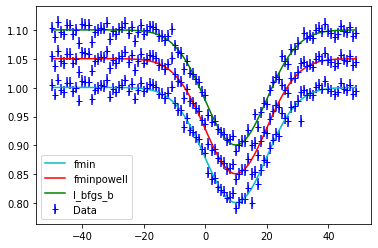

In [4]:
plt.errorbar(x, y, yerr=yerr, fmt='b+', label="Data")
plt.plot(x, model1, 'c-', label="fmin")
plt.errorbar(x, y+0.05, yerr=yerr, fmt='b+')
plt.plot(x, model2+0.05, 'r-', label="fminpowell")
plt.errorbar(x, y+0.1, yerr=yerr, fmt='b+')
plt.plot(x, model3+0.1, 'g-', label="l_bfgs_b")
plt.legend()
plt.show()